In [1]:
import numpy as np
import pandas as pd

import nltk
from nltk.tokenize import RegexpTokenizer

import re
import matplotlib.pyplot as plt

pd.set_option('max_colwidth', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data analysis

In [3]:
data = pd.read_csv('/content/drive/MyDrive/kaggle/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/kaggle/test_without_target.csv')

In [4]:
data.shape, test_data.shape

((16177, 5), (16183, 4))

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16177 entries, 0 to 16176
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      16177 non-null  int64 
 1   title   16177 non-null  object
 2   text    16177 non-null  object
 3   images  7223 non-null   object
 4   source  16177 non-null  int64 
 5   tokens  16177 non-null  object
dtypes: int64(2), object(4)
memory usage: 758.4+ KB


In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16183 entries, 0 to 16182
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      16183 non-null  int64 
 1   title   16183 non-null  object
 2   text    16183 non-null  object
 3   images  7238 non-null   object
 4   tokens  16183 non-null  object
dtypes: int64(1), object(4)
memory usage: 632.3+ KB


In [5]:
print("{} classes".format(data['source'].nunique()))
data['source'].value_counts()

7 classes


6    3624
1    3427
4    2606
3    2228
0    1695
5    1564
2    1033
Name: source, dtype: int64

In [6]:
data.head()

Id  ... source
0   1  ...      5
1   2  ...      6
2   5  ...      2
3   9  ...      3
4  10  ...      0

[5 rows x 5 columns]

# Preprocessing

In [7]:
def merge_columns(df, text_field1, text_field2):
  df[text_field1] = df[text_field1] + df[text_field2]
  return df

# data = merge_columns(data, "text", "title")
# test_data = merge_columns(test_data, "text", "title")

# data  

In [8]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"[^a-zа-яіїє0-9]", " ")
    df[text_field] = df[text_field].str.replace(r"\n", "")
    return df

cleaned_data = standardize_text(data, "text")
cleaned_test = standardize_text(test_data, "text")

cleaned_data.to_csv('clean_data.csv')
cleaned_test.to_csv('clean_test.csv')

In [9]:
tokenizer = RegexpTokenizer(r'\w+')
cleaned_data["tokens"] = cleaned_data["text"].apply(tokenizer.tokenize)
cleaned_test["tokens"] = cleaned_test["text"].apply(tokenizer.tokenize)

In [31]:
cleaned_data.head()

Id  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     tokens
0   1  ...                                                                                                                                                  [понад, півтора, мільйони, пацієнтів, із, тяжкими, діагнозами, ризикують, залишитись, без, ліків, у, 2020, році, бо, моз, блокує, закупівлі, заблоковані, рекордні, майже, 10, мільярдів, гривень, у, бюджеті, на, закупівлю, ліків, та, медвиробів, ключові, документи, не, підписувалися, 4, місяці, з, голими, руками, і, неадекватними, заявами, міністра, ємця, як, україна, зустрічає, коронавірус, і, це, в, час, коли, у, світі, пандемія, коронавірусу, дефіцит, багатьох, ліків, країни, стають, в, чергу, на, постачання, і, рахунок, іде, не, на, дні, а, на, години, натомість, україна, в, цю, чергу, ще, навіть, не, стала, з, листопада, 2019, року, був, готовий, документ, перелік, ліків, і, медвиробів, для, закупівель, і, він, ...]
1   2  ...  [за, 15, років, державна, підтримка, виробництва, енергії, виробленої, з, альтернативних, джерел, перетворилася, на, непідйомний, тягар, для, україни, про, це, повідомляє, ресурс, наші, гроші, зазначається, що, для, припинення, неконтрольованого, субсидування, зеленої, генерації, ліга, антитрасту, підготувала, звернення, до, антимонопольного, комітету, про, незаконну, державну, допомогу, та, запрошує, долучитися, до, його, підписання, всіх, чиї, права, порушуються, йдеться, насамперед, про, так, званий, зелений, тариф, спеціальний, завищений, тариф, за, яким, держава, гарантовано, скуповує, усю, електричну, енергію, вироблену, з, альтернативних, джерел, енергії, енергія, сонця, вітру, тощо, повідомляють, наші, гроші, за, їх, даними, створивши, надсприятливі, умови, для, зеленої, генерації, держава, втратила, контроль, за, її, ростом, за, деякими, оцінками, ...]
2   5  ...                                                                                                                     [у, польщі, виявили, 15, 698, нових, хворих, на, коронавірус, вдвічі, більше, аніж, учора, джерело, заступник, голови, міністерства, охорони, здоров, я, польщі, вальдемар, краска, польському, радіо, wnp, pl, пряма, мова, сьогоднішні, результати, свідчать, що, третя, хвиля, це, не, тільки, факт, але, ми, також, можемо, спостерігати, як, вона, набирає, обертів, сьогодні, у, нас, підтверджено, 15, 698, нових, випадків, це, майже, вдвічі, більше, ніж, учора, 309, поляків, померли, внаслідок, зараження, коронавірусом, за, даними, міністерства, охорони, здоров, я, минулої, середи, було, підтверджено, 12, 146, інфікувань, а, 372, людини, померли, два, тижні, тому, було, підтверджено, 8, 694, зараження, а, 279, людей, померло, за, словами, заступника, ...]
3   9  ...                                                                                                                                                                                                                          [2, жовтня, котирування, гривні, до, долара, на, закритті, міжбанку, встановились, на, рівні, 28, 36, 28, 37, гривні, про, це, повідомляє, finance, ua, на, 16, 59, середні, курси, валют, на, міжбанку, були, наступними, долар, сша, 

In [11]:
all_words = [word for tokens in cleaned_data["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in cleaned_data["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

6286518 words total, with a vocabulary size of 251399
Max sentence length is 10166


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

list_corpus = cleaned_data["text"].tolist()
list_labels = cleaned_data["source"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

In [13]:
X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [16]:
test_list = cleaned_test["text"].tolist()
test_list

['падіння економічного рівня в україні не є критичним і сягає 4 5   за підрахунками єбрр  офіційну статистику та прогнози європейський банк планує оприлюднити на початку жовтня  коли буде зібрання акціонерів  про це повідомила заступниця директора єбрр в україні ірина новікова на львівському діловому форумі  передає  укрінформ    якщо подивитися на карту світу  де відбулися зміни в економіці від пандемії  то ситуація в країнах  що розвиваються  нічим не гірша  ніж у розвинутих  таких як англія чи німеччина  поки що  за нашими підрахунками  падіння економіки в україні становить близько 4 5   до кінця року може зрости до 5 5   але наші прогнози   оптимістичні  ми вважаємо  що наступного року економіка в державі буде відновлюватися  тому що для цього є всі фактори розвитку     сказала новікова  представниця єбрр також повідомила  що вже через тиждень відбудеться зібрання акціонерів  де будуть присутні і представники з україни  і офіційно оприлюднять дані по економічних показниках   падінн

In [22]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

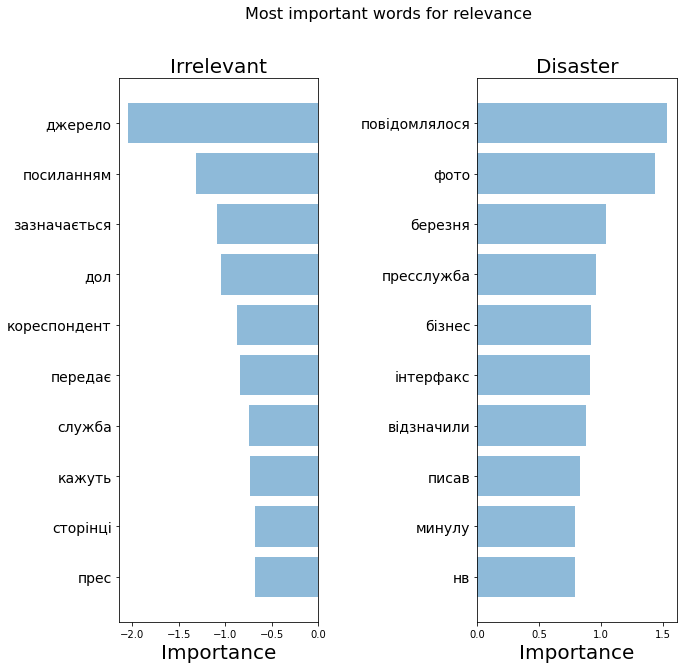

In [23]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Irrelevant', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Disaster', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[1]['tops']]
top_words = [a[1] for a in importance[1]['tops']]
bottom_scores = [a[0] for a in importance[1]['bottom']]
bottom_words = [a[1] for a in importance[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

Text(0.5, 1.0, 'Word cloud for text column')

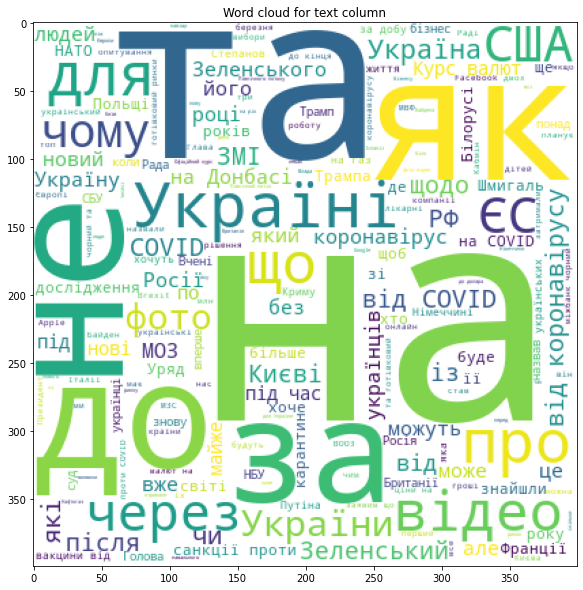

In [29]:
from wordcloud import WordCloud
desc = " ".join(str(des) for des in data['title'])

wc_desc = WordCloud(background_color='white', max_words=200, width=400, height=400,random_state=10).generate(desc)
plt.figure(figsize=(10,10))
plt.imshow(wc_desc)
plt.title("Word cloud for text column")

In [30]:
# Stop words ukrainian
# https://github.com/skupriienko/Ukrainian-Stopwords

def delete_words(df):
  df = df.copy()
  for i in range(0, df.index.stop):
    row = [word for word in cleaned_test['tokens'][i] if word not in words['words'].tolist()]
    row = ' '.join([str(elem) for elem in row])
    df['tokens'][i] = row
  return df

# Training

In [17]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)
y_predicted_counts = clf.predict(X_test_counts)

In [18]:
test_counts = count_vectorizer.transform(test_list)

In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  

    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.807, precision = 0.807, recall = 0.807, f1 = 0.807


In [20]:
y_pred = clf.predict(test_counts)
submit_test = pd.concat([cleaned_test['Id'], pd.DataFrame(y_pred)], axis=1)
submit_test.columns=['Id', 'Predicted']
submit_test.to_csv('submission.csv', index=False)
submit_test

Id  Predicted
0          0          3
1          3          6
2          4          5
3          6          4
4          7          4
...      ...        ...
16178  32362          1
16179  32363          6
16180  32364          0
16181  32370          4
16182  32372          0

[16183 rows x 2 columns]

TF-IDF

In [25]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
test_counts = tfidf_vectorizer.transform(test_list)

In [26]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [27]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.825, precision = 0.824, recall = 0.825, f1 = 0.824


In [28]:
y_pred = clf_tfidf.predict(test_counts)
submit_test = pd.concat([cleaned_test['Id'], pd.DataFrame(y_pred)], axis=1)
submit_test.columns=['Id', 'Predicted']
submit_test.to_csv('submission.csv', index=False)
submit_test

Id  Predicted
0          0          3
1          3          6
2          4          5
3          6          4
4          7          4
...      ...        ...
16178  32362          1
16179  32363          5
16180  32364          0
16181  32370          4
16182  32372          0

[16183 rows x 2 columns]